In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
# Define function to create scree plot from dataframe and print list of variance explained by each component to determine number of features to use
def get_scree(df):
    X = StandardScaler().fit_transform(df)
    Xt = X.T
    Cx = np.cov(Xt)
    eig_val_cov,eig_vec_cov = np.linalg.eig(Cx)
    print('''
    The Percentage of the data explained by each component can be seen below
    ''')
    print(eig_val_cov / sum(eig_val_cov))
    plt.plot(eig_val_cov)
    plt.title("SCREE PLOT",size=(20))
    plt.xlabel("Principal Component Number")
    plt.ylabel("Eigenvalues")
    plt.show()

In [3]:
# Define function to perform pca
# INPUTS 
# N = number of components
# df = data for PCA
def do_pca(df,N):
    sklearn_pca = PCA(n_components=N)
    Y_sklearn = sklearn_pca.fit_transform(df)
    return Y_sklearn

I will compress the subcategories shown below into the larger categories listed in this [link](https://www.doyouevendata.com/wp-content/uploads/2018/03/cato.gif)

In [60]:
# Read in data and print full list of columns
hfi = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Capstone_2\cato_2017_index.csv')
hfi = hfi.dropna()
hfi_cols = list(hfi.columns)
print(hfi_cols)

['ISO_Code', 'Countries', 'Procedural Justice', 'Civil Justice', 'Criminal Justice', 'Rule of Law', 'Homicide', 'Disappearances', 'Violent Conflicts', 'Organised Conflicts', 'Terrorism Fatalities', 'Terrorism Injuries', 'Disapperances  Conflicts and Terrorism', 'Female Genital Mutilation', 'Missing Women', 'Inheritance Rights: Widows', 'Inheritance Rights: Daughters', 'Inheritance Rights', 'Womens Security & Safety', 'Security & Safety', 'Domestic Movement', 'Foreign Movement', 'Womens Movement', 'Movement', 'Establishing and Operating Religious Organizations', 'Harassment and Physical Hostilities', 'Legal and Regulatory Restrictions', 'Religion', 'Association', 'Assembly', 'Political Parties', 'Professional Organizations', 'Educational Sporting and Cultural Organizations', 'Establishing and Operating Organizations', 'Association Assembly & Civil Society', 'Press Killed', 'Press Jailed', 'Laws and Regulations that Influence Media Content', 'Political Pressures and Controls on Media Con

In [61]:
# Make empty dataframe to store subclasses from pca in
final_df = pd.DataFrame(hfi['PERSONAL FREEDOM (Score)'])

## LEGAL PROTECTION AND SECURITY (all below subcategories within this cateogory)
lps = hfi[['PERSONAL FREEDOM (Score)','Procedural Justice','Civil Justice','Criminal Justice',
           'Disappearances','Violent Conflicts','Organised Conflicts','Terrorism Fatalities',
           'Terrorism Injuries','Female Genital Mutilation','Missing Women','Inheritance Rights']]

# Rule of Law
rol = hfi[['Procedural Justice','Civil Justice','Criminal Justice']]
# Disappearences, Conflicts, and Terrorism
dct = hfi[['Disappearances','Violent Conflicts','Organised Conflicts','Terrorism Fatalities','Terrorism Injuries']]
# Womens Security and Safety
wss = hfi[['Missing Women','Inheritance Rights','Female Genital Mutilation']]


    The Percentage of the data explained by each component can be seen below
    
[0.93075636 0.04965457 0.01958907]


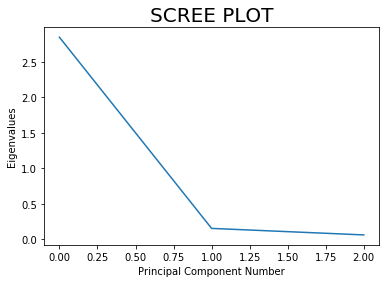

In [62]:
get_scree(rol)

In [63]:
# Based on scree plot above data can be represented by 1 component
final_df['RULE OF LAW'] = do_pca(rol,1)

In [64]:
print(final_df.head(n=5))

    PERSONAL FREEDOM (Score)  RULE OF LAW
3                       8.05     0.870879
5                       9.22    -3.194303
6                       9.38    -4.406651
10                      5.52     5.280324
12                      9.19    -3.549493



    The Percentage of the data explained by each component can be seen below
    
[0.76503815 0.15058193 0.07033292 0.00883859 0.00520841]


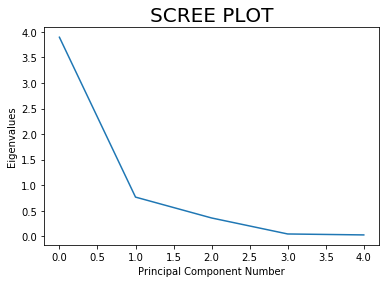

In [65]:
get_scree(dct)

In [66]:
# 1 component could most likely be used here but 2 will better explain the data
df = do_pca(dct,2)
final_df['DCT1'] = df[:,0]
final_df['DCT2'] = df[:,1]

In [67]:
print(final_df.head(n=5))

    PERSONAL FREEDOM (Score)  RULE OF LAW      DCT1      DCT2
3                       8.05     0.870879 -0.854820  0.895289
5                       9.22    -3.194303 -2.256362 -0.576281
6                       9.38    -4.406651 -2.261665 -0.581801
10                      5.52     5.280324  4.468116 -0.687839
12                      9.19    -3.549493 -2.261665 -0.581801



    The Percentage of the data explained by each component can be seen below
    
[0.68248027 0.31751973 0.        ]


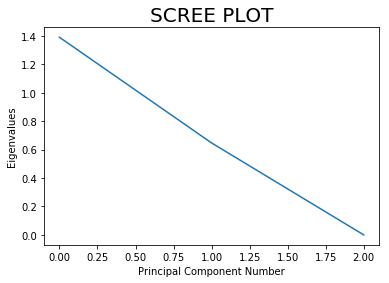

In [68]:
get_scree(wss)

In [69]:
# 2 Components will explain this data the best
df = do_pca(wss,2)
final_df['WSS1'] = df[:,0]
final_df['WSS2'] = df[:,1]

In [70]:
# Compressed 11 features down into 4
final_df.head(n=10)

,PERSONAL FREEDOM (Score),RULE OF LAW,DCT1,DCT2,WSS1,WSS2
3,8.05,0.870879,-0.854820,0.895289,-1.824268,-0.145664
5,9.22,-3.194303,-2.256362,-0.576281,-1.824268,-0.145664
6,9.38,-4.406651,-2.261665,-0.581801,-1.824268,-0.145664
10,5.52,5.280324,4.468116,-0.687839,8.455548,0.612868
12,9.19,-3.549493,-2.261665,-0.581801,-1.824268,-0.145664
19,6.89,2.208961,-2.261665,-0.581801,3.102531,-0.998098
26,9.13,-2.890319,-2.259967,-0.579340,-1.824268,-0.145664
30,8.23,-1.130585,-2.261665,-0.581801,3.102531,-0.998098
32,6.90,2.791000,10.317967,-1.674826,-1.824268,-0.145664
35,8.26,-1.196614,-2.261665,-0.581801,-1.824268,-0.145664


In [71]:
# Below additional categories will be compressed in the same manner that the data was in the study

# Movement
mov = hfi[['Domestic Movement','Foreign Movement','Womens Movement']]


    The Percentage of the data explained by each component can be seen below
    
[0.65188065 0.07183118 0.27628817]


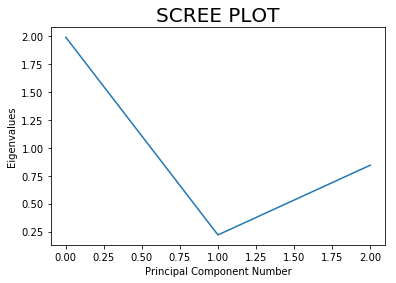

In [72]:
get_scree(mov)

In [73]:
# Can be explained with 1 component but weak correlation
final_df['MOV'] = do_pca(mov,1)

In [74]:
final_df.head(n=5)

,PERSONAL FREEDOM (Score),RULE OF LAW,DCT1,DCT2,WSS1,WSS2,MOV
3,8.05,0.870879,-0.854820,0.895289,-1.824268,-0.145664,-1.652360
5,9.22,-3.194303,-2.256362,-0.576281,-1.824268,-0.145664,-1.652360
6,9.38,-4.406651,-2.261665,-0.581801,-1.824268,-0.145664,-1.652360
10,5.52,5.280324,4.468116,-0.687839,8.455548,0.612868,6.496747
12,9.19,-3.549493,-2.261665,-0.581801,-1.824268,-0.145664,-1.652360


In [75]:
# Religion
rel = hfi[['Establishing and Operating Religious Organizations','Harassment and Physical Hostilities','Legal and Regulatory Restrictions']]


    The Percentage of the data explained by each component can be seen below
    
[0.56633015 0.3061215  0.12754835]


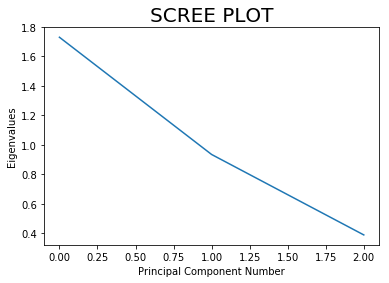

In [76]:
get_scree(rel)

In [77]:
# Should use 2 components here in order to better describe data
df = do_pca(rel,2)
final_df['REL1'] = df[:,0]
final_df['REL2'] = df[:,1]

In [78]:
final_df.head(n=5)

,PERSONAL FREEDOM (Score),RULE OF LAW,DCT1,DCT2,WSS1,WSS2,MOV,REL1,REL2
3,8.05,0.870879,-0.854820,0.895289,-1.824268,-0.145664,-1.652360,0.921520,-0.567407
5,9.22,-3.194303,-2.256362,-0.576281,-1.824268,-0.145664,-1.652360,-1.824239,-0.994422
6,9.38,-4.406651,-2.261665,-0.581801,-1.824268,-0.145664,-1.652360,-1.181142,1.115050
10,5.52,5.280324,4.468116,-0.687839,8.455548,0.612868,6.496747,1.730464,2.101833
12,9.19,-3.549493,-2.261665,-0.581801,-1.824268,-0.145664,-1.652360,-1.227996,0.960763


In [79]:
# Expression and Information
eai = hfi[['Press Killed','Press Jailed','Laws and Regulations that Influence Media Content','Political Pressures and Controls on Media Content', 'Access to Cable/Satellite', 'Access to Foreign Newspapers', 'State Control over Internet Access']]


    The Percentage of the data explained by each component can be seen below
    
[0.49982638 0.18982208 0.11660618 0.01059609 0.05877488 0.02698904
 0.09738534]


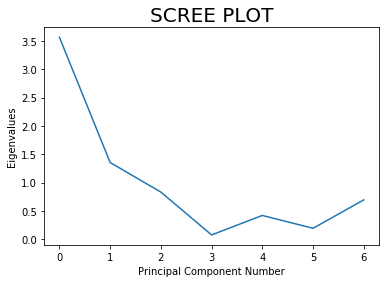

In [80]:
get_scree(eai)

In [81]:
# 3 components is the best way to represent this data
df = do_pca(eai,3)
final_df['EAI1'] = df[:,0]
final_df['EAI2'] = df[:,1]
final_df['EAI3'] = df[:,2]

In [82]:
# Print the final dataframe with the 11 new classes created to represent the data above
final_df.head(n=10)

,PERSONAL FREEDOM (Score),RULE OF LAW,DCT1,DCT2,WSS1,WSS2,MOV,REL1,REL2,EAI1,EAI2,EAI3
3,8.05,0.870879,-0.854820,0.895289,-1.824268,-0.145664,-1.652360,0.921520,-0.567407,0.818720,0.010438,-0.763733
5,9.22,-3.194303,-2.256362,-0.576281,-1.824268,-0.145664,-1.652360,-1.824239,-0.994422,-3.117049,0.228655,-0.383174
6,9.38,-4.406651,-2.261665,-0.581801,-1.824268,-0.145664,-1.652360,-1.181142,1.115050,-2.868062,0.050848,-0.597195
10,5.52,5.280324,4.468116,-0.687839,8.455548,0.612868,6.496747,1.730464,2.101833,4.307799,-1.468509,1.645064
12,9.19,-3.549493,-2.261665,-0.581801,-1.824268,-0.145664,-1.652360,-1.227996,0.960763,-4.688225,1.059272,0.141117
19,6.89,2.208961,-2.261665,-0.581801,3.102531,-0.998098,-1.652360,2.789115,-3.007946,0.043313,-2.728643,1.157820
26,9.13,-2.890319,-2.259967,-0.579340,-1.824268,-0.145664,-1.652360,-1.626595,-0.344953,-3.710710,0.525151,-0.234266
30,8.23,-1.130585,-2.261665,-0.581801,3.102531,-0.998098,-1.652360,-1.751271,-0.768391,-2.328596,-0.188427,-0.647009
32,6.90,2.791000,10.317967,-1.674826,-1.824268,-0.145664,-0.302004,-1.694374,-0.573015,1.581447,-1.240041,1.051393
35,8.26,-1.196614,-2.261665,-0.581801,-1.824268,-0.145664,-1.652360,-1.440811,0.248616,-3.905501,0.645737,-0.119338


In [83]:
# Collect all columns that were compressed above
data_compressed = hfi[['PERSONAL FREEDOM (Score)','Procedural Justice','Civil Justice','Criminal Justice','Disappearances','Violent Conflicts','Organised Conflicts','Terrorism Fatalities',
'Terrorism Injuries','Female Genital Mutilation','Missing Women','Inheritance Rights','Domestic Movement','Foreign Movement','Womens Movement','Establishing and Operating Religious Organizations',
'Harassment and Physical Hostilities','Legal and Regulatory Restrictions','Press Killed','Press Jailed','Laws and Regulations that Influence Media Content',
'Political Pressures and Controls on Media Content', 'Access to Cable/Satellite', 'Access to Foreign Newspapers', 'State Control over Internet Access']]

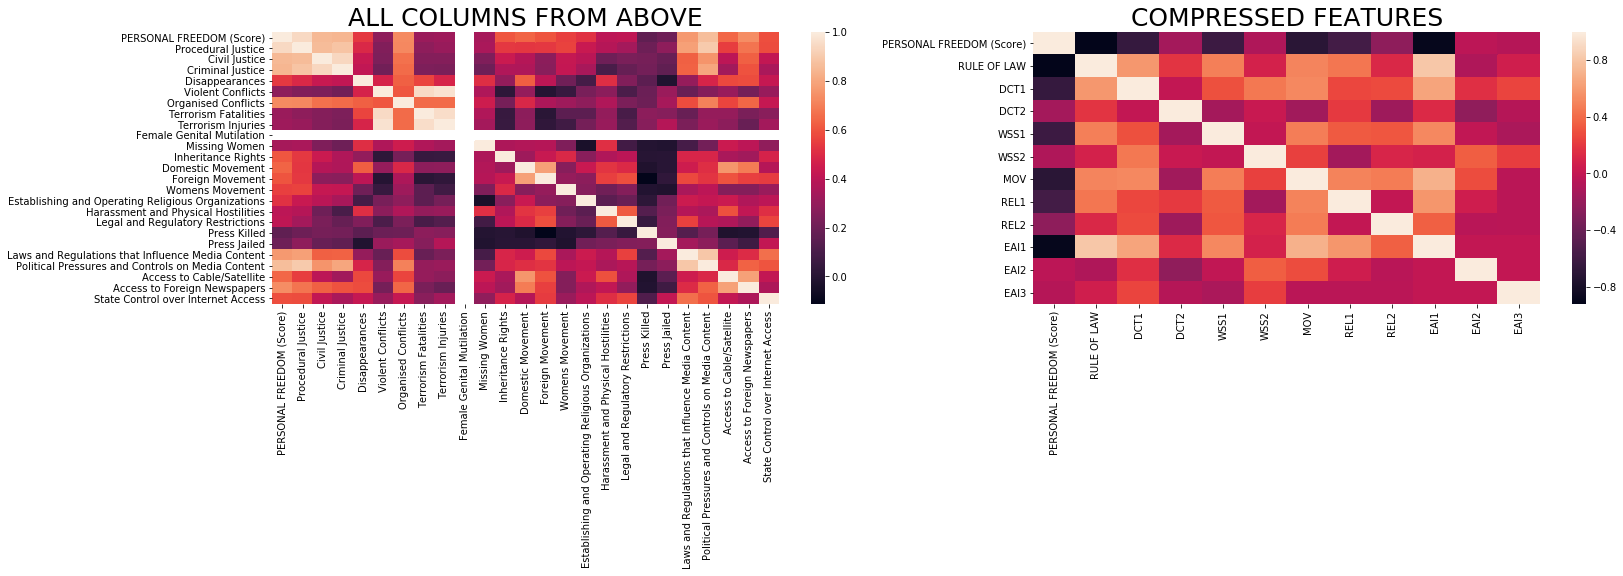

In [84]:
# Create correlation heatmap with all columns (left) and only the features created (right) to show reduction in size of data
plt.figure(figsize=(25,5))
plt.subplot(121)
plt.title("ALL COLUMNS FROM ABOVE",size=25)
sns.heatmap(data_compressed.corr())
plt.subplot(122)
plt.title("COMPRESSED FEATURES",size=25)
sns.heatmap(final_df.corr())